<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D/%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 시각화
- 합성곱 층의 가중치와 특성 맵 시각화
    - 합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해
- 합성곱 신경망
    - 이미지에 있는 특징을 찾아 압축하는데 뛰어난 성능을 가짐
    - 합성곱 신경망의 체크포인트 파일을 사용함(최적의 에포크까지 훈련한 모델 파라미터를 저장하고 있음)
- 케라스는 좀더 복잡한 모델을 만들 수 있도록 함수형 API를 제공함

# 가중치 시각화
- 합성곱층 : 여러개의 필터를 사용하여 특징 학습
    - 필터 : 커널, 가중치와 절편을 가짐
    - 절편 : 시각적으로 의미x
    - 가중치 : 입력이 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할
    - 특성 : 선 > 면

ex) 아래 그림과 같이 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만듬

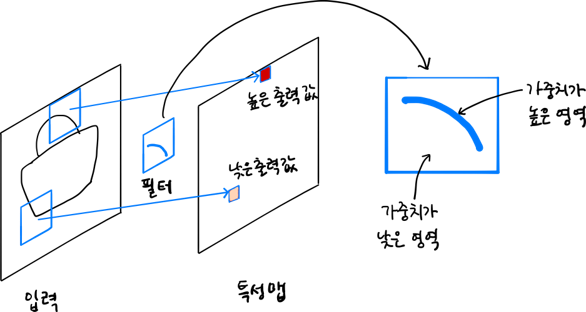

In [1]:
# 이 필터의 가운데 곡선 부분의 가중치 값은 높고 그 외의 부분의 가중치 값은 낮을 것임
# 이렇게 해야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만듬

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듬

import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow import keras
# 코랩에서 실행하는 경우, 다음 명령을 실행하여 best-cnn-model.keras 파일 다운

!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-01-13 07:28:00--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-01-13 07:28:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.08s   

2025-01-13 07:28:00 (48.1 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

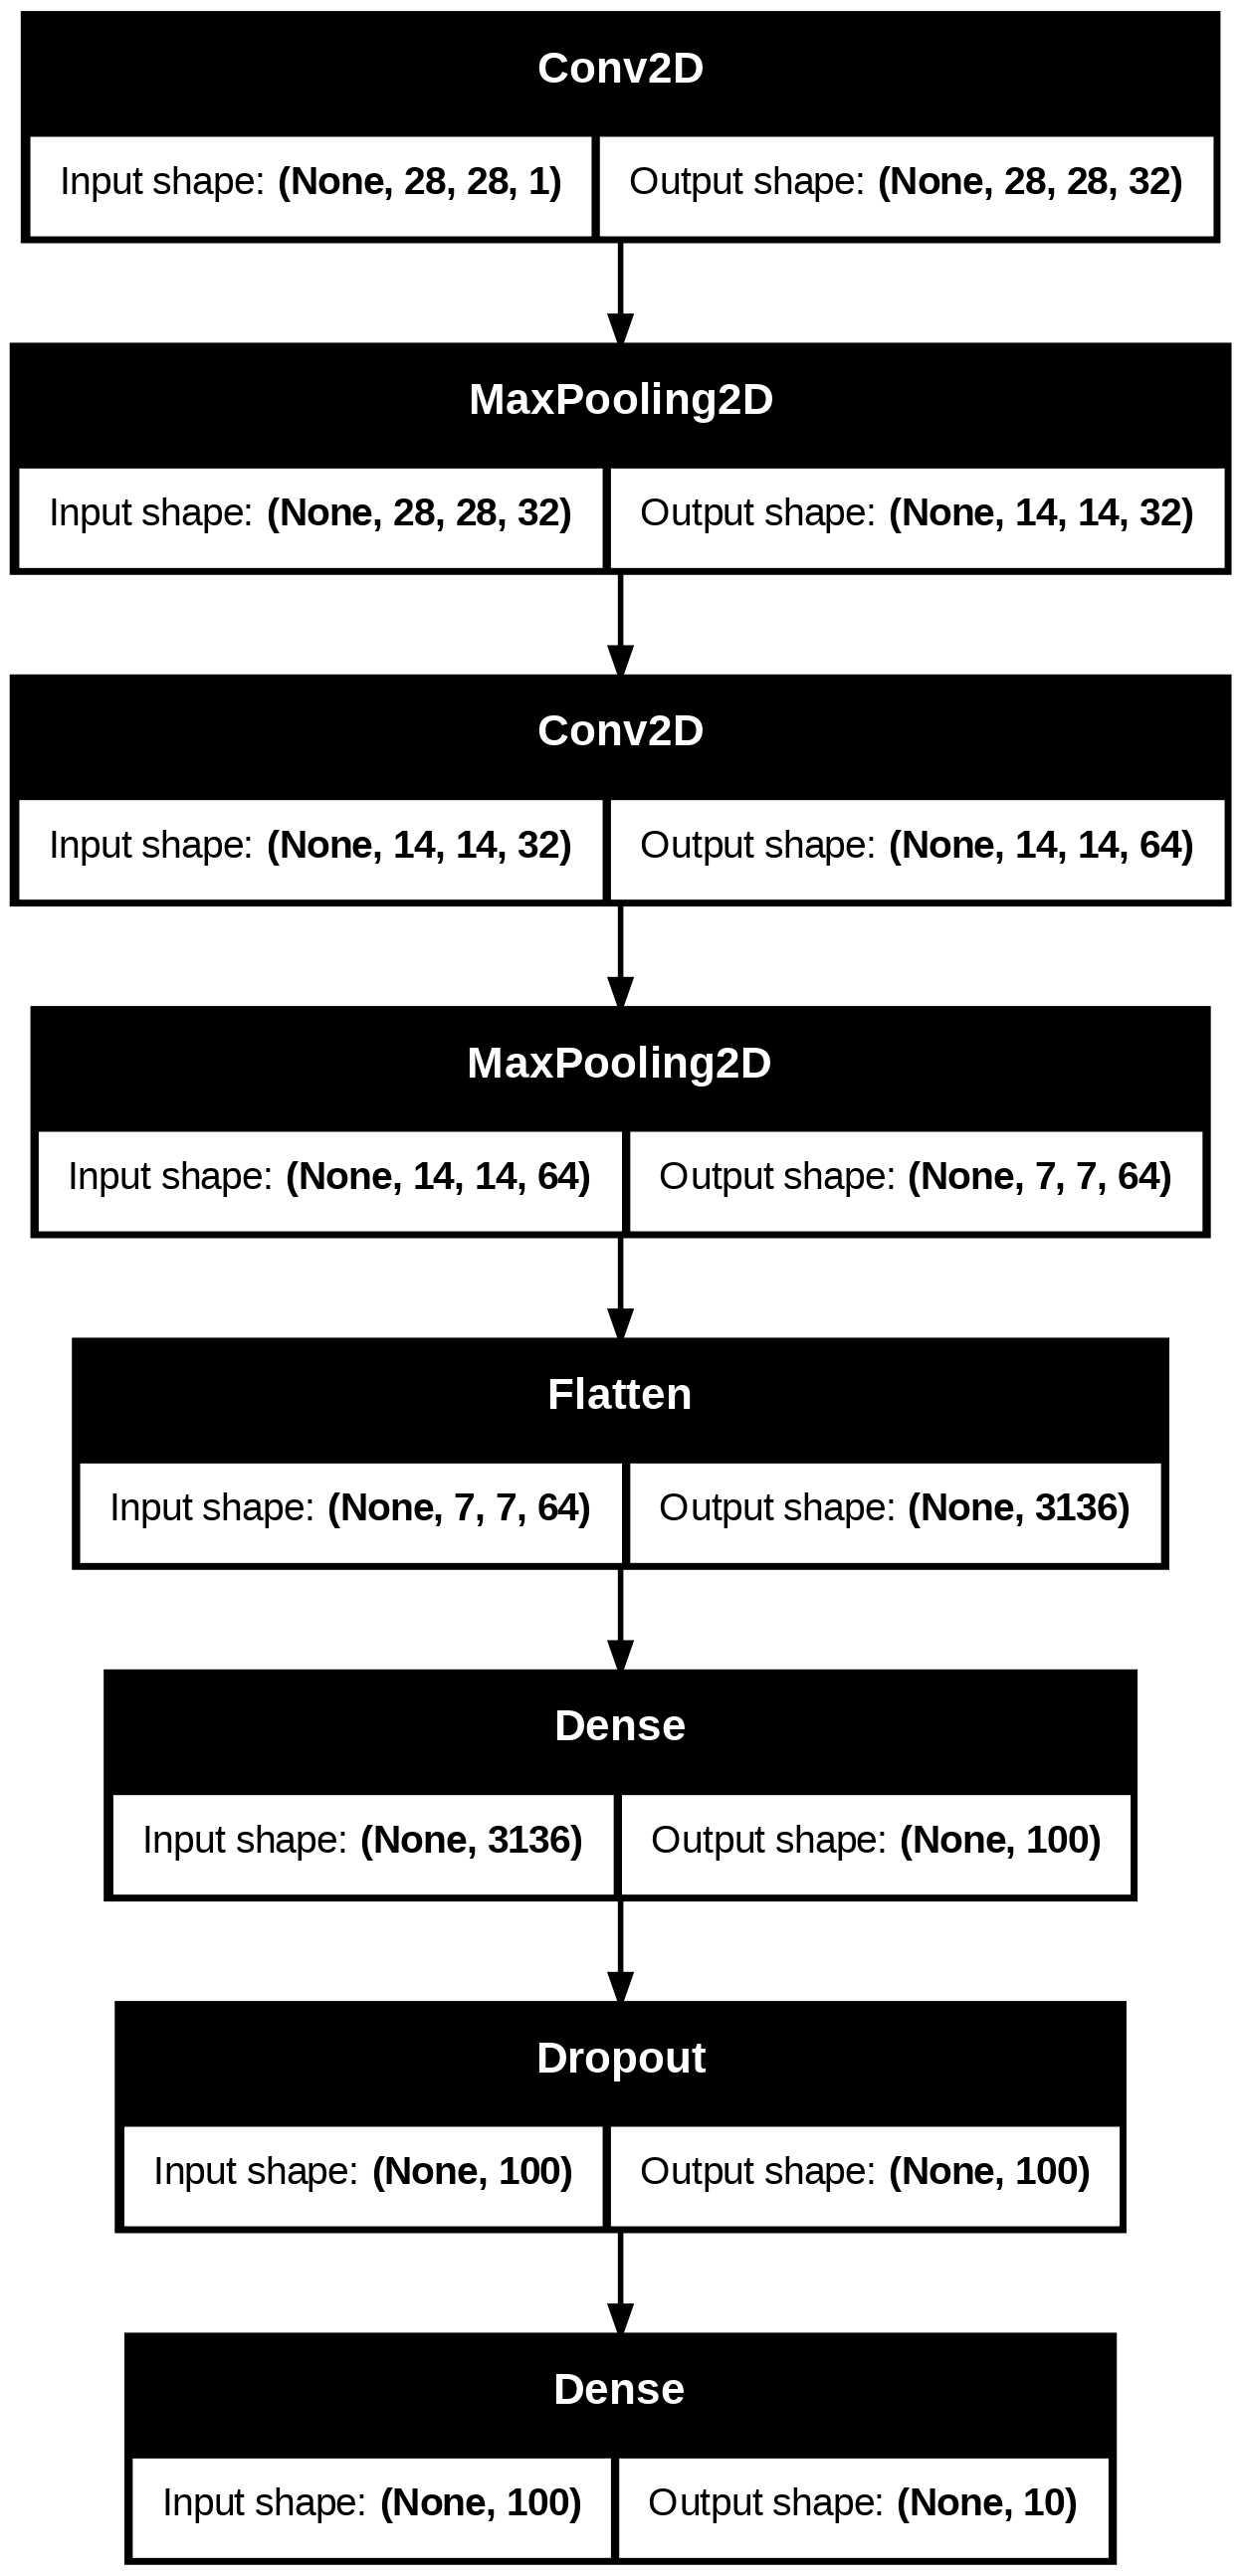

In [2]:
model = keras.models.load_model('best-cnn-model.keras')
# model.layers 리스트에 전에 만들었던 Conv2D, MaxPoolin2D 층이 번갈아 가변서 연속으로 나옴
# Flatten 층 -> Dense층 -> Dropout층 -> Dense출력층
model.layers
model.summary()
keras.utils.plot_model(model, show_shapes=True)
# show_shapes : 입출력 표시여부

# 합성곱 가중치확인
- 층의 가중치와 절편은 층의 weight 속성에 있음(리스트타입)

## 훈련된 모델(training_model)

In [3]:
# 첫번쨰 합성곱층의 가중치
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)
"""
(3, 3, 1, 32) (32,)
(원소)        (절편)
전에 커널(도장) 크기를 3x3으로 지정했음
합성곱 층의 전달되는 입력의 깊이가 1

필터 개수가 32개이믕로 필터마다 1개의 절편이 있어 (32, )가 됨
"""

(3, 3, 1, 32) (32,)


'\n(3, 3, 1, 32) (32,)\n(원소)        (절편)\n전에 커널(도장) 크기를 3x3으로 지정했음\n합성곱 층의 전달되는 입력의 깊이가 1\n\n필터 개수가 32개이믕로 필터마다 1개의 절편이 있어 (32, )가 됨\n'

In [4]:
# weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체
# 다루기 쉽게 numpy() 메서드를 사용해 배열로 변환
conv_weights = conv.weights[0].numpy()

#가중치 배열의 평균, 평균편차 계산
print("평균 : ", conv_weights.mean(), " 평균편차 : ",conv_weights.std())
# 결과
# 평균은 0에 가깝고, 편차는 0.23정도임

평균 :  -0.014383553  평균편차 :  0.23351653


### 시각화

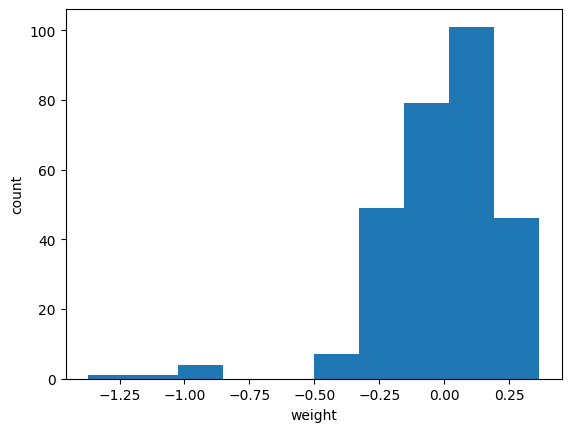

In [5]:
# 가중치가 어떤 분포를 가졌는지 직관적으로 확인
import matplotlib.pyplot as plt

# hist()함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야함
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()
# 0을 중심으로 분포도를 확인할 수 있음

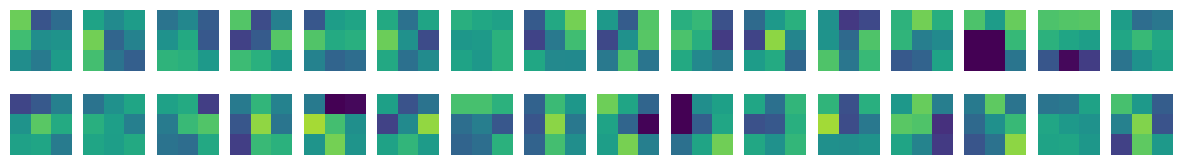

In [6]:
# 32개의 커널을 16개씩 2개로 출력
fig, axs = plt.subplots(2,16, figsize=(15,2))

# 2 * 16 = 32개의 그래프 영역을 만들고 순서대로 커널을 출력
for i in range(2): # i : 행의 인덱스 0 ~ 1
    for j in range(16): # j : 열의 인덱스 0 ~ 15
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 +j], vmin = -0.5, vmax = 0.5) # 0.0 ~ 0.31
        axs[i, j].axis('off')

# 배열의 마지막 차원을 순회하면서 0~16 + j번째까지의 가충지 값을 차례대로 출력
plt.show()
# 가중치의 값을 무작위로 나열된 것이 아닌 어떤 패턴을 볼 수 있음

ex)
- 첫번째 줄의 맨 왼쪽 가중치는 오른쪽 3필셀의 값이 높음(밝은 부분이 높음)
- 이 가중치는 오른쪽에 놓인 직선을 만나면 크게 활성화됨
- .imshow() 함수는 배열에 있는 최대값과 최소값을 사용해 픽셀의 강도를 표현함
- 즉 0.1이나 0.4나 어떤 값이든 그 배열의 최댓값이면 가장 밝은 노란색을 그림
- 만약 두 배열을 imshow() 함수로 비교하려면 이런 방법은 좋지 않음
- 어떤 절대값을 기준으로 픽셀의 강도를 나타내야 비교하기 좋을 것이다.
- 이를 위해 위 코드에서 vmin, vmax로 matplotlib의 컬러맵(colormap)으로 표현할 범위를 지정한다.

## 훈련되지 않은 모델(no_training)

In [7]:
# 훈련하지 않은 빈 합성곱 신경망 생성
# 가중치가 위에서 본 훈련 가중치와 어떻게 다른지 비교

no_training_model = keras.Sequential()

# Conv2D층 추가
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', padding='same', input_shape=(28, 28, 1)))

# no_training_conv에 Conv2D층의 가중치 저장
no_training_conv = no_training_model.layers[0]

# 동일하게 (3,3) 커널을 가진 필터를 32개 사용
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 가중치의 평균, 평균편차확인
no_training_weights = no_training_conv.weights[0].numpy() #numpy 배열

# 평균(0에 가까움), 표준편차(매우작음)
print("평균 : ", no_training_weights.mean(), " 표준편차 : ",no_training_weights.std())

평균 :  0.0053191613  표준편차 :  0.08463709


### 시각화

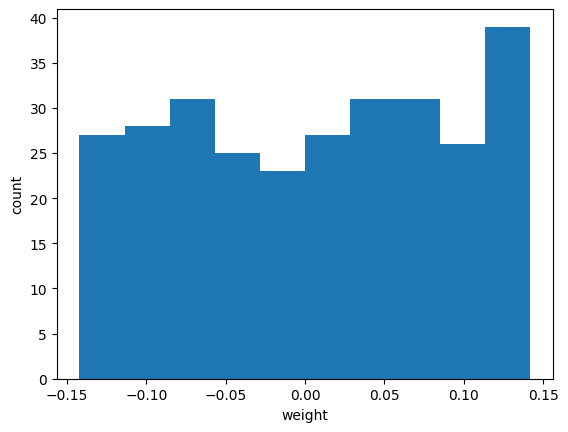

In [9]:
import matplotlib.pyplot as plt

# hist()함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야함
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()
# 대부분 가중치가 -0.15 ~ 0.15 사이에 있음
# 비교적 고른 분포를 보임
# 텐서플로가 신경망의 가중치를 처음 초기화할때 균등하게 분포에서 랜덤하게 값으 선택함

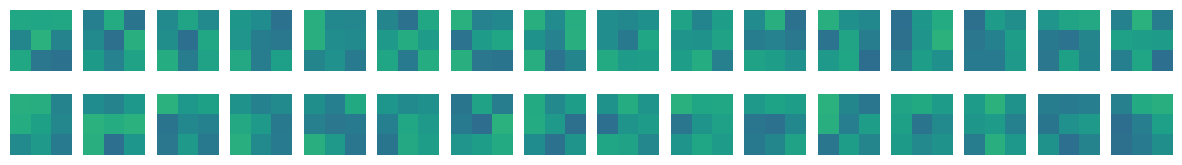

In [10]:
# 32개의 커널을 16개씩 2개로 출력
fig, axs = plt.subplots(2,16, figsize=(15,2))

for i in range(2): # i : 행의 인덱스 0 ~ 1
    for j in range(16): # j : 열의 인덱스 0 ~ 15
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 +j], vmin = -0.5, vmax = 0.5) # 0.0 ~ 0.31
        axs[i, j].axis('off')

plt.show()
# 위의 훈련된 모델의 그림과 비교하면 가중치가 밋밋하게 표현

## 결론
- 분류 정확도를 높이기 위해서 유용한 패턴을 학습했다라는 사실이 나옴

# 함수형 API
- 케라스의 내장함수
- 케라스의 Model 클래스를 사용하여 모델을 만듬
- 딥러닝에는 좀더 복잡한 모델이 많이 있음
    - 케라스의 Sequential 클래스는 층을 차례대로 쌓은 모델을 만듬
    
    ex)입력이 2개, 출력2개일수도 있음

변수를 이용해여 재사용할 있도록 정리

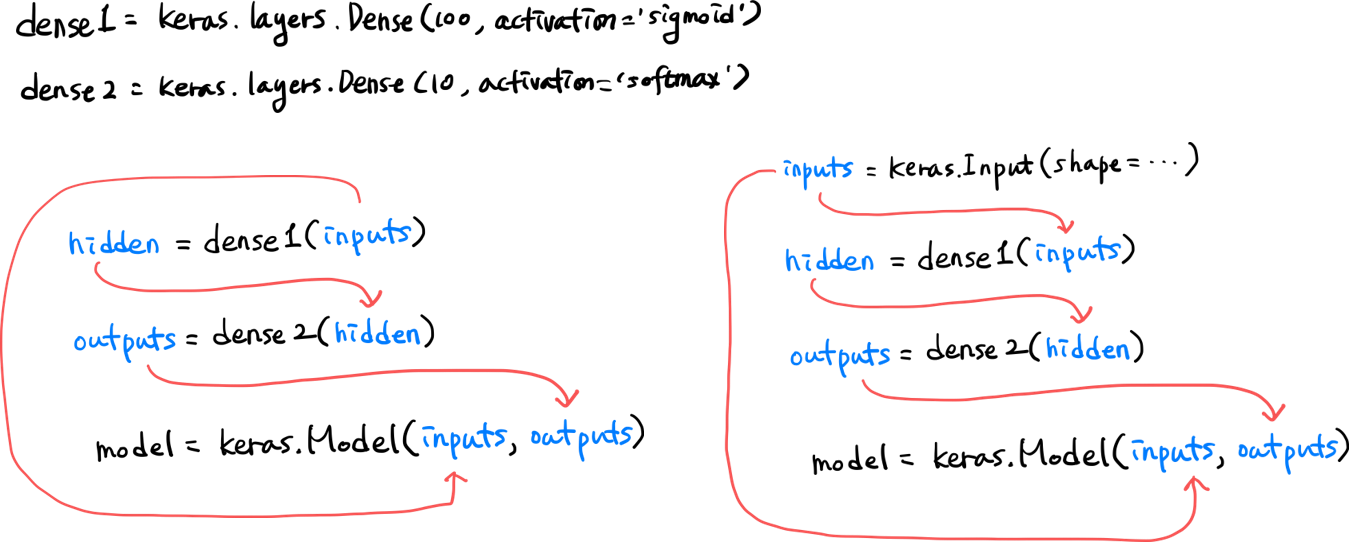

- Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현
    - 2개의 Dense 층 객체 만듬 keras.Model()안쪽 파라미터로 제공
- 입력에서 출력까지 층을 호출할 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정함
- input=keras.input()
    - plot_model() 함수로 모델의 층을 도식화 했을 때, InputLayer 클래스가 처음 나온 것으로 Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해줌
- Model 클래스에서는 우리가 수동으로 만들어서 호출해야함
<br/><br/>
- 전체를 합쳐보면 오른쪽 위 그림 처럼 체인으로 동작
- 입력에서 출력까지 연결하고 마지막에 Model 클래스에 입력과 출력을 지정하여 모델을 만듬
- 이렇게 모델을 만들게 되면 중간에 다양한 형태의 층을 연결할 수 있음

In [ ]:
# 예제
# inputs = keras.input(shape =(784,))

# dense1 = keras.layers.Dense(100, activation = 'sigmoid')
# dense2 = keras.layers.Dense(10, activation = 'softmax')

# hidden = dense1(inputs)
# outputs = dense2(hidden)
# model = keras.Model(inputs, outputs)

함수형 API가 필요한 이유 : model 객체의 층을 순서대로 나열할 경우
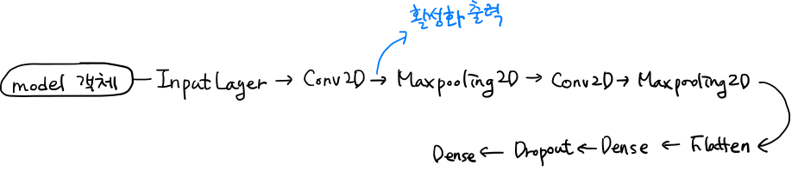

- 2개 이상의 입력이 필요한 부분 : 첫번째 Conv2D의 출력부분
- Model 객체의 입력과 Conv2D의 출력을 알수 있다면 이둘을 연결하여 새로운 모델을 얻을 수 있음

- 중간분석 : conv_acti

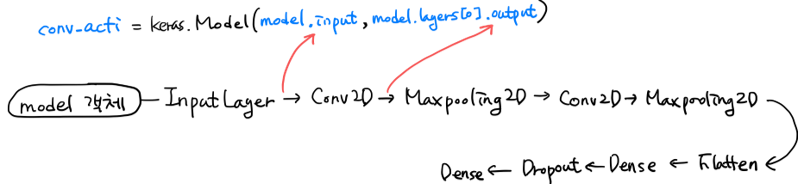

- model 객체를 predict() 메서드를 호출하면 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환한다.
- 하지만 우리가 필요한 것은 첫번째 Conv2D 층의 출력한 특성 맵임

- 각각의 값을 얻을 수 있는 속성
    - 첫 번째 층의 출력 : Conv2D 객체의 output 속성
    
    =>  model.layer[0].output 을 참조
    - 입력 : model.inputs

In [22]:
print(model.inputs)
# [<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


## 중간결과확인(conv_acti)
- model.input과 model.layers[0].output을 연결하는 새로운 모델
- model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환
    
    => model.predict(val_scaled[0:1])
- 하지만 conv_acti의 predict() 메서드를 호출하면 첫번째 Conv2D의 출력을 반환

    => conv_acti.predict(inputs)

In [14]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

# 특성맵 시각화

## 데이터

In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


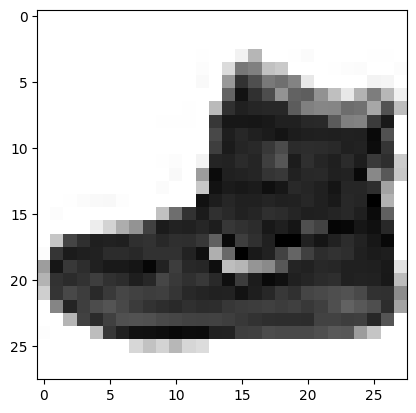

In [16]:
# 첫번째 샘플 출력
plt.imshow(train_input[0], cmap="gray_r")
plt.show()
# 결과 : 앵글부츠

## 중간모델확인(conv_acti) : 1번 합성곱층
- 해당 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력
- predict() 메서드는 항상 입력의 첫번째 차원이 배치 차원일 것으로 기대함
- 하나의 샘플을 전달하더라도 꼭 첫번째 차원을 유지해야함
- 이를 위해서 슬라이싱 연산자를 사용해 첫번째 샘프을 선택한다
- 그 다음 (784,) 크기를 (28,28,1)로 변경하고 255.0으로 나눔(전처리과정은 동일)

In [17]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv_acti(inputs) # 특성맵의 출력이 만들어짐

In [18]:
print(feature_maps.shape) # maps의 크기를 확인
# (1, 28, 28, 32) 1장의 이미지, 28x28 크기, 특성도장 32개

(1, 28, 28, 32)


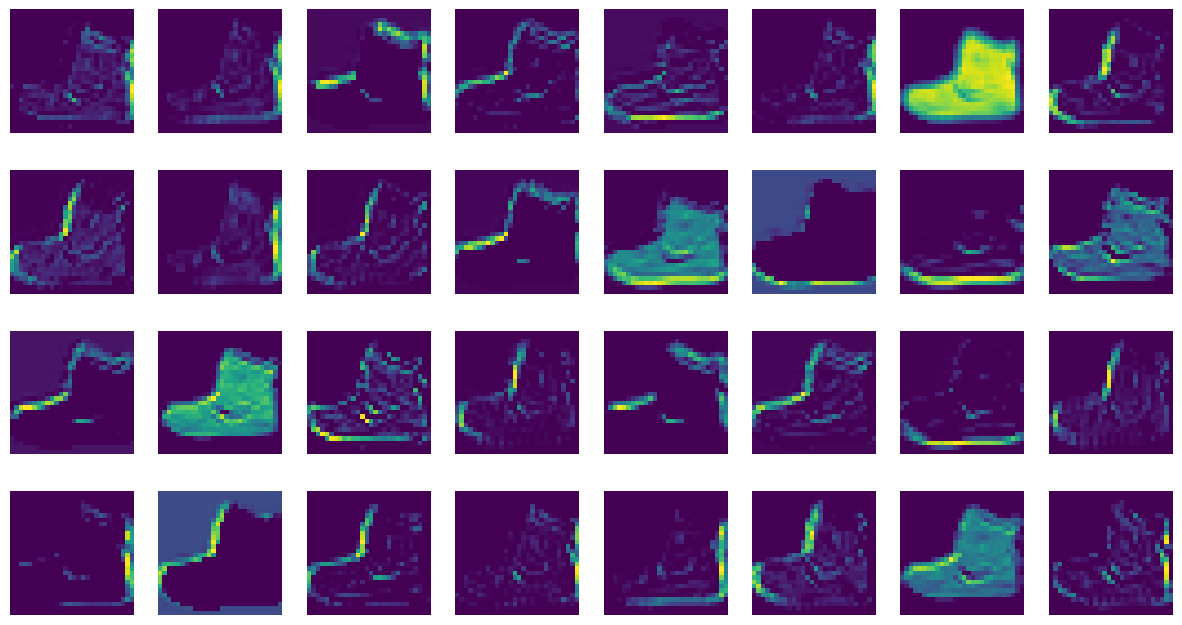

In [20]:
# 세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28, 28, 32)임
# 첫번째 차원은 배치 차원이라는 점을 명시
# 샘플을 하나 입력했기 때문에 1이 됨

# imshow() 함수로 특성맵을 그려보자 -> 총 32개이므로 4행 8열로 나눔
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 +j])
        axs[i, j].axis('off')

plt.show()
# 28 * 28픽셀

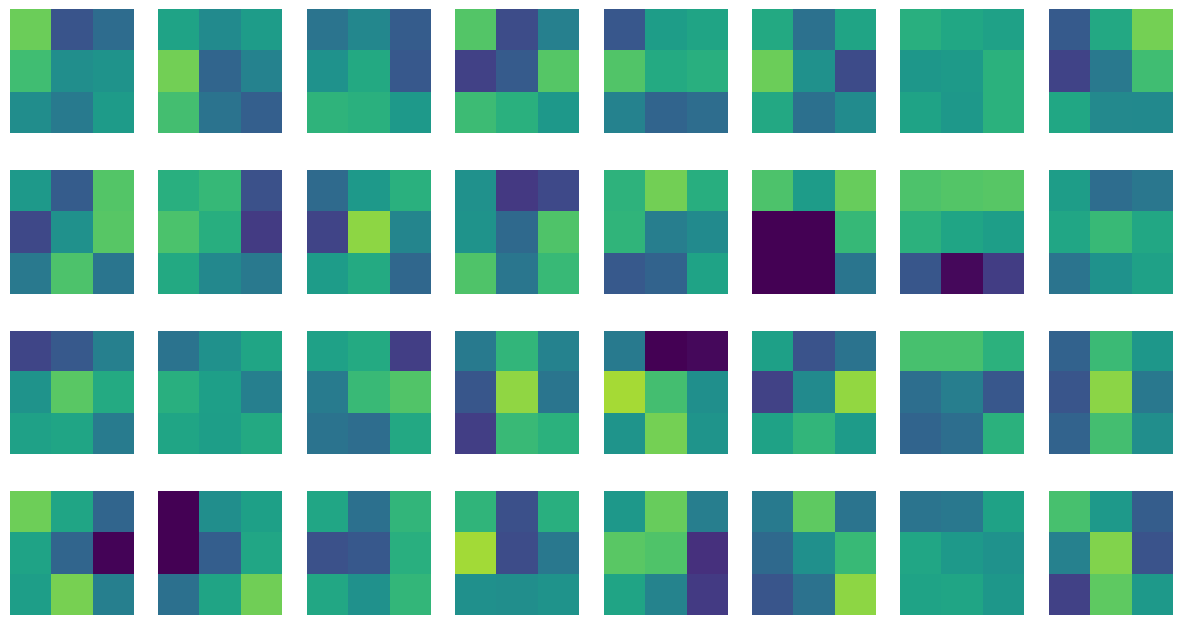

In [25]:
# 특성맵고 비교(필터의 가중치를 출력한 그림과 1 : 1비교)

fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(conv_weights[ :, :, 0, i*8 +j], vmin = -0.5, vmax=0.5)
        # vmin, vamx 로 최소, 최대의 값을 묶어서 나타냄
        axs[i, j].axis('off')

plt.show()

### 가중치 비교결과
- 7번째그림을 비교하면 전체적으로 밝은 색이므로 전면이 모두 필해진 영역으로 감지
- 2번째 줄 5번째 그림을 보면 왼쪽이 검정색, 흑백 부츠 이미지에서 금은 영역이 모두 잘 활성화 되어 있음
<br/><br/>

- 이와 반대로 마지막 필터는 전체적으로 낮은 음수 값이다.
- 이 필터와 큰 양수가 곱해지면 더 큰 음수가 되고 배경처럼 0에 가까운 값과 곱해지면 작은 음수가 될 것임

### 결론
- 즉 부츠의 배경이 상대적으로 크게 활성화 될 수 있음

## 중간모델확인(conv_acti) : 2번 합성곱층
- 두번째 합성곱층이 만든 특성맵도 같은 방식으로 확인가능

In [31]:
# 먼저 model객체의 입력과 두번째 합성곱층인 model.layer[2]의 출력을 연결한 conv2_acti모델을 만듬
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [32]:
# 첫번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1) / 255.0)

# 첫번째 풀링에서 가로세로 크기가 절반으로 줄였고
# 두번째 합성곱 층의 필터 개수는 64개 이므로 feature_maps 의 크기는 배치 차원을 제외하면 (14,14,64)임
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 14, 14, 64)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

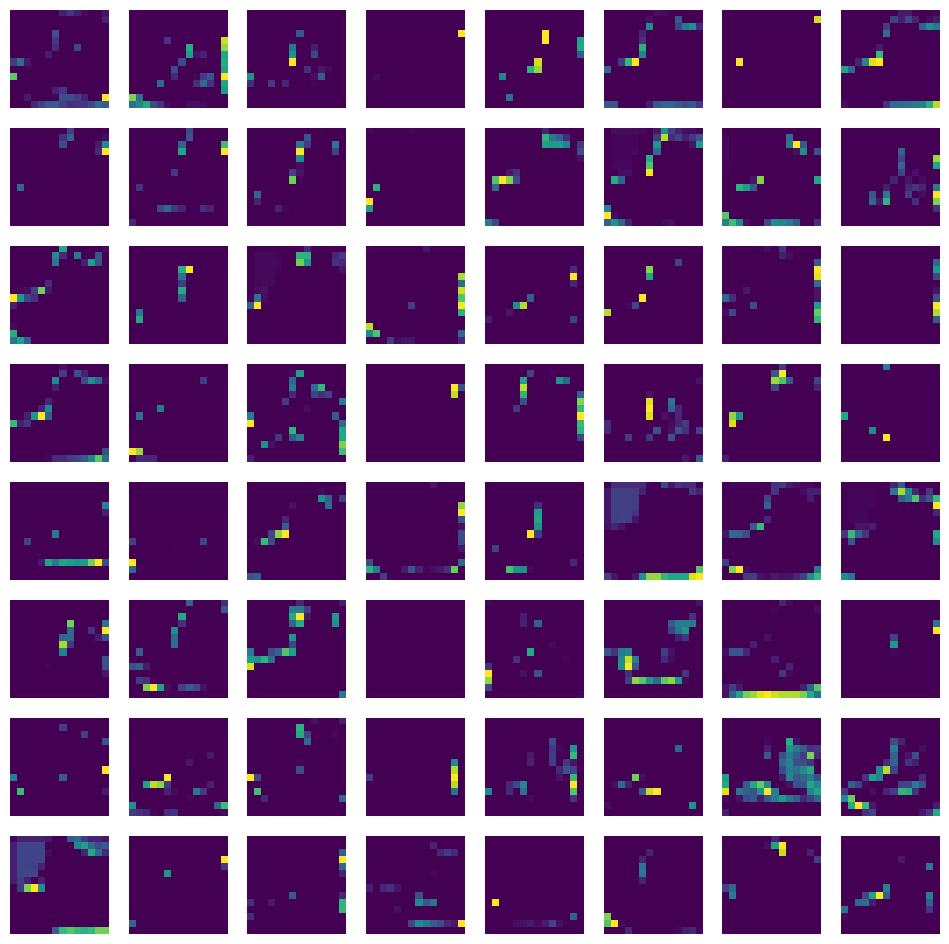

In [34]:
# 64개의 특성맵을 행8, 열8
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 +j])
        # vmin, vamx 로 최소, 최대의 값을 묶어서 나타냄
        axs[i, j].axis('off')

plt.show()

### 가중치 비교결과
- 이 특성 맵은 시각적으로 이해가 힘듬
- 두번째 합성곱 층
    - 필터 크기 : (3,3,32)
    - 두번째 합성곱 층의 첫번째 필터가 앞서 출력한 32개의 특성 맵과 곱해짐
    - 두번째 합성곱 층의 첫 번째 특성 맵이 됨
- 이렇게 계산된 출력은 (14,14,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 힘들지만 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지를 시각적인 정보를 감지함
- 뒷부분은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 보면 됨 -> 10개의 클래스를 찾을 수 있는 이유

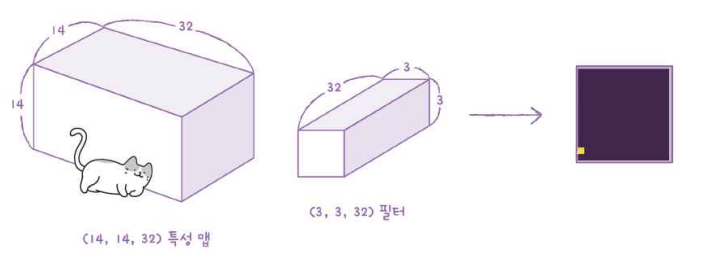